In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from libs import utils
# utils.<tab>
files = utils.get_celeb_files()

(218, 178, 3)


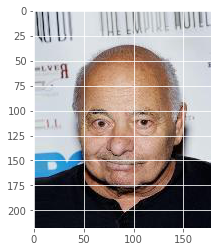

In [3]:
img = plt.imread(files[50])
print (img.shape)
plt.imshow(img)

In [4]:
imgs = utils.get_celeb_imgs()

In [5]:
data = np.array(imgs)
data.shape

(100, 218, 178, 3)

(218, 178, 3)


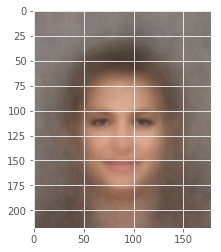

In [6]:
imgs_mean = np.mean(data, axis = 0)
print(imgs_mean.shape)
plt.imshow(imgs_mean.astype(np.uint8))

(218, 178, 3) <class 'numpy.ndarray'>


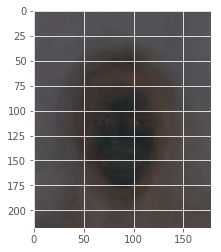

In [7]:
imgs_std = np.std(data, axis = 0)
print(imgs_std.shape, type(imgs_std))
plt.imshow(imgs_std.astype(np.uint8))

In [8]:
d1 = imgs_std.astype(np.uint8)
d2 = imgs_std
d = d1 - d2
print(d.shape)

(218, 178, 3)


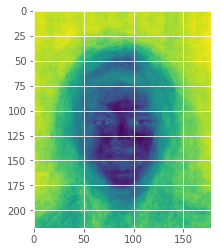

In [9]:
plt.imshow(np.mean(imgs_std, axis=2).astype(np.uint8))

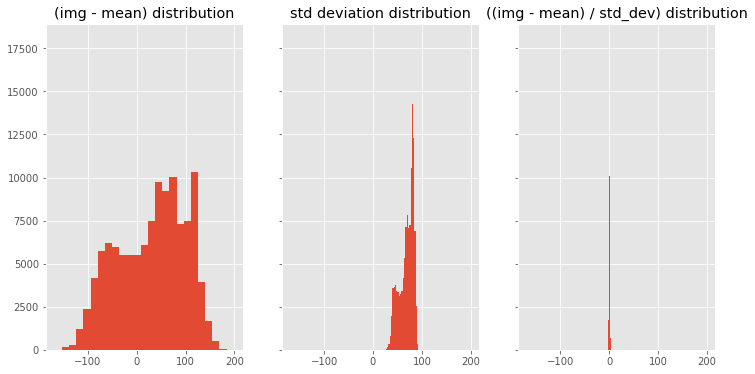

In [10]:
bins = 25
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - imgs_mean).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((imgs_std).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - imgs_mean) / imgs_std).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')

In [11]:
import tensorflow as tf

In [12]:
x = tf.linspace(-3.0, 3.0, 100)
print(x)

Tensor("LinSpace:0", shape=(100,), dtype=float32)


In [13]:
g = tf.get_default_graph()

In [14]:
[op.name for op in g.get_operations()]

['LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace']

In [15]:
# We're first going to create a session:
sess = tf.Session()
# Now we tell our session to compute anything we've created in the tensorflow graph.
computed_x = sess.run(x)
#print(computed_x)
# Alternatively, we could tell the previous Tensor to evaluate itself using this session:
computed_x = x.eval(session=sess)
#print(computed_x)

# We can close the session after we're done like so:
sess.close()

In [16]:
sess = tf.Session(graph=g)
sess.close()
g2 = tf.Graph()
sess = tf.InteractiveSession()
x.eval()

array([-3.        , -2.939394  , -2.87878799, -2.81818175, -2.75757575,
       -2.69696975, -2.63636351, -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.33333325, -2.27272725, -2.21212125, -2.15151501,
       -2.090909  , -2.030303  , -1.969697  , -1.90909088, -1.84848475,
       -1.78787875, -1.72727275, -1.66666663, -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.42424238, -1.36363626, -1.30303025, -1.24242425,
       -1.18181813, -1.12121201, -1.060606  , -1.        , -0.939394  ,
       -0.87878776, -0.81818175, -0.75757575, -0.69696951, -0.63636351,
       -0.5757575 , -0.5151515 , -0.4545455 , -0.39393926, -0.33333325,
       -0.27272725, -0.21212101, -0.15151501, -0.090909  , -0.030303  ,
        0.030303  ,  0.09090924,  0.15151525,  0.21212125,  0.27272749,
        0.33333349,  0.3939395 ,  0.4545455 ,  0.5151515 ,  0.57575774,
        0.63636374,  0.69696975,  0.75757599,  0.81818199,  0.87878799,
        0.939394  ,  1.        ,  1.060606  ,  1.12121201,  1.18

In [17]:
mean = 0.0
sigma = 1.0
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

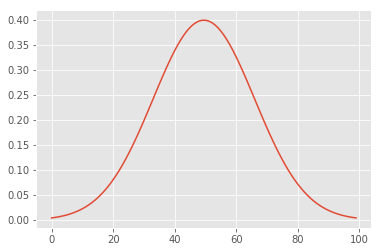

In [18]:
res = z.eval()
plt.plot(res)

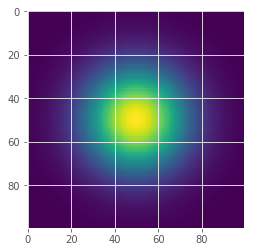

In [19]:
ksize = z.get_shape().as_list()[0]
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))
plt.imshow(z_2d.eval())

(512, 512)


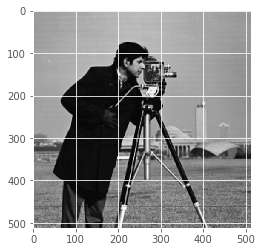

In [20]:
from skimage import data
img = data.camera().astype(np.float32)
plt.imshow(img, cmap='gray')
print(img.shape)

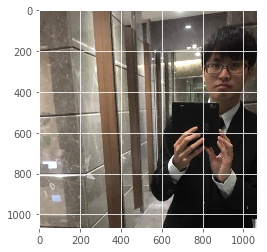

In [21]:
import os
file1 = os.listdir('../img_preprocessing/img_align_celeba')[-1]
file1 = os.path.join('../img_preprocessing/img_align_celeba', file1) 
img1 = np.array(plt.imread(file1))
plt.imshow(img1)
img1 = np.mean(img1, axis = 2)

Tensor("Reshape_2:0", shape=(1, 512, 512, 1), dtype=float32)
(1, 512, 512, 1)


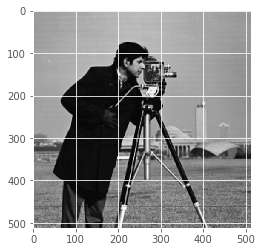

In [22]:
img = data.camera().astype(np.float32)
plt.imshow(img, cmap='gray')
img_4d = tf.reshape(img, [1, img.shape[0], img.shape[1], 1])
print(img_4d)
print(img_4d.get_shape())

In [23]:
# Reshape the 2d kernel to tensorflow's required 4d format: H x W x I x O
z_4d = tf.reshape(z_2d, [ksize, ksize, 1, 1])
print(z_4d.get_shape().as_list())
convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1, 1, 1, 1], padding='SAME')
res = convolved.eval()
print(res.shape)

[100, 100, 1, 1]
(1, 512, 512, 1)



There are two new parameters here: strides, and padding. <p>
Strides says how to move our kernel across the image. Basically,<br>
Basically, we'll only ever use it for one of two sets of parameters:<br>
[1, 1, 1, 1], which means, we are going to convolve every single image, every pixel,<br>
and every color channel by whatever the kernel is.<br>
and the second option:</p>
[1, 2, 2, 1], which means, we are going to convolve every single image,<br>
but every other pixel, in every single color channel.<p>
Padding says what to do at the borders. If we say "SAME", <br>
that means we want the same dimensions going in as we do going out.<p>
In order to do this, zeros must be padded around the image. <br>
If we say "VALID", that means no padding is used, and the image dimensions will actually change.</p>


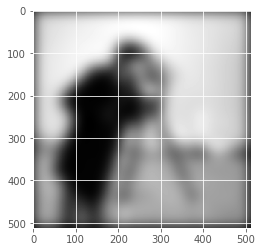

In [24]:
plt.imshow(res[0,:,:,0], cmap = 'gray')

In [25]:
img1 = img1.astype(np.float32)
img_4d1 = tf.reshape(img1, [1, img1.shape[0], img1.shape[1], 1])
convolved1 = tf.nn.conv2d(img_4d1, z_4d, strides =[1, 1, 1, 1], padding = 'SAME')
res1 = convolved1.eval()

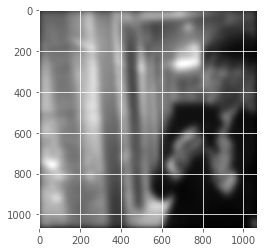

In [26]:
plt.imshow(res1[0, :, :, 0], cmap = 'gray')

## Modulating the Gaussian with a Sine Wave to create Gabor Kernel

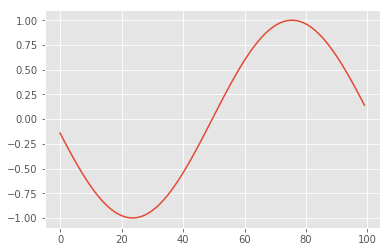

In [27]:
xs = tf.linspace(-3.0, 3.0, ksize)
ys = tf.sin(xs)
plt.figure()
plt.plot(ys.eval())

(100, 100)


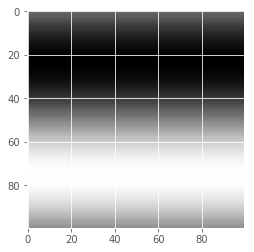

In [28]:
ys = tf.reshape(ys, [ksize, 1])
ones = tf.ones((1, ksize))
wave = tf.matmul(ys, ones)
print(wave.get_shape())
plt.imshow(wave.eval(), cmap='gray')

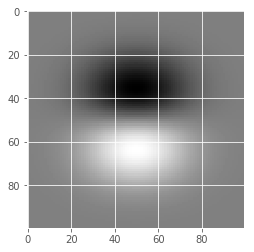

In [29]:
gabor = tf.multiply(wave, z_2d)
plt.imshow(gabor.eval(), cmap='gray')

# Manipulating an image with this Gabor


In [30]:
img = tf.placeholder(tf.float32, shape = [None, None], name = 'img')
img_3d = tf.expand_dims(img, 2)
# 1 * H * W * 1
img_4d = tf.expand_dims(img_3d, 0)
print(img_4d.get_shape().as_list())

[1, None, None, 1]


In [31]:
# Let's create another set of placeholders for our Gabor's parameters:
mean = tf.placeholder(tf.float32, name='mean')
sigma = tf.placeholder(tf.float32, name='sigma')
ksize = tf.placeholder(tf.int32, name='ksize')

In [32]:
# Then finally redo the entire set of operations we've done to convolve our
# image, except with our placeholders
x = tf.linspace(-3.0, 3.0, ksize)
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
      (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
z_2d = tf.matmul(
    tf.reshape(z, tf.stack([ksize, 1])),
    tf.reshape(z, tf.stack([1, ksize])))
ys = tf.sin(x)
ys = tf.ones(tf.stack([ksize, 1]))
ones = tf.ones(tf.stack([1, ksize]))
wave = tf.matmul(ys, ones)
gabor = tf.multiply(wave, z_2d)
gabor_4d = tf.reshape(gabor, tf.stack([ksize, ksize, 1, 1]))

In [33]:
# And finally, convolve the two:
convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME', name='convolved')
convolved_img = convolved[0, :, :, 0]

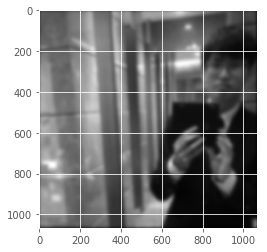

In [34]:
res = convolved_img.eval(feed_dict={
    img: img1, mean:0.0, sigma:0.5, ksize:100})
plt.imshow(res, cmap='gray')

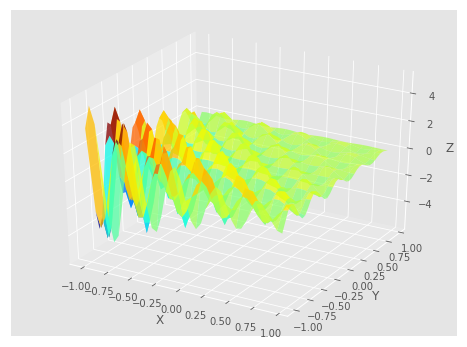

In [36]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize = (8, 6))
ax = fig.gca(projection = '3d')
hz = 15
x, y = np.mgrid[-1:1:0.05, -1:1:0.05]
X, Y, Z = x, y, np.sin(hz * x) * np.cos(hz * y) * np.exp(-x) * np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

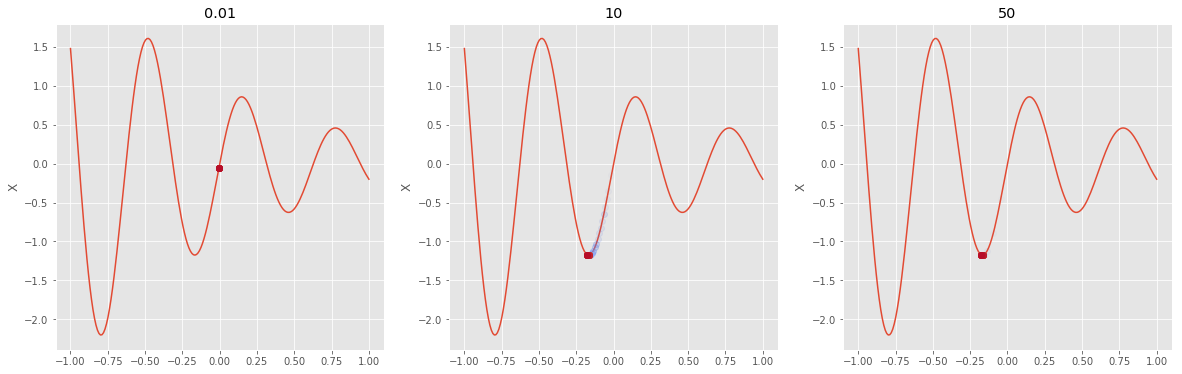

In [43]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
n_iterations = 100
fig, axs = plt.subplots(1, 3, figsize = (20, 6))

for rate_i, learning_rate in enumerate([0.01, 10, 50]):
    ax = axs[rate_i]
    x = np.linspace(-1, 1, 200)
    hz = 10
    y = np.sin(hz * x) * np.exp(-x)
    gradient = np.diff(y)
    ax.plot(x, y)
    ax.set_ylabel('Y')
    ax.set_ylabel('X')
    ax.set_title(str(learning_rate))
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin = 0, vmax = n_iterations)
    scalar_map = cmx.ScalarMappable(norm = c_norm, cmap = cmap)
    init_p = 100
    for iter_i in range(n_iterations):
        init_p -= learning_rate * gradient[int(init_p)]
        ax.plot(x[int(init_p)], y[int(init_p)], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))
        